###### Rachit Chadha

#### Telco Customer Churn Classification

# How Likely is the Customer to Churn Away?

In [59]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [60]:
#loaded the data
df = pd.read_csv('/Users/Rachit/Downloads/CC.csv')

In [61]:
# To Check if Feature is unique
df.customerID.value_counts()

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

In [62]:
#set index
df = df.set_index('customerID')

Explore The Data

In [63]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [64]:
# What are my binary variables to convert?
#df.describe gives quantitative variables. "include All" is to include categorical
df.describe(include="all")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [65]:
#here is a list of column names to split into binary, categorical, numerical
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [66]:
#Check for N/A
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Split the Data by making a list of Binary, Categorical and Binary variables

In [67]:
binary_var = ['gender','Partner','Dependents','PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies','PaperlessBilling', 'Churn']

In [68]:
#now we see unique values that we'll convert
for i in binary_var:
    print (i,df[i].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
PaperlessBilling ['Yes' 'No']
Churn ['No' 'Yes']


Convert the String values to Binary Values

In [69]:
#converted Gender to binary
df['gender'] = df['gender'].replace('Female', 1)
df['gender'] = df['gender'].replace('Male', 0)

In [70]:
df['gender']

customerID
7590-VHVEG    1
5575-GNVDE    0
3668-QPYBK    0
7795-CFOCW    0
9237-HQITU    1
             ..
6840-RESVB    0
2234-XADUH    1
4801-JZAZL    1
8361-LTMKD    0
3186-AJIEK    0
Name: gender, Length: 7043, dtype: int64

In [71]:
#removed gender cuz rest are similar
binary_var.remove('gender')

In [72]:
binary_var

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [73]:
#List Comprehension to convert our binary variables 
for i in binary_var:
  df[i] = [1 if x == 'Yes' else 0 for x in df[i]]

In [74]:
print(df[binary_var])

            Partner  Dependents  PhoneService  MultipleLines  OnlineSecurity  \
customerID                                                                     
7590-VHVEG        1           0             0              0               0   
5575-GNVDE        0           0             1              0               1   
3668-QPYBK        0           0             1              0               1   
7795-CFOCW        0           0             0              0               1   
9237-HQITU        0           0             1              0               0   
...             ...         ...           ...            ...             ...   
6840-RESVB        1           1             1              1               1   
2234-XADUH        1           1             1              1               0   
4801-JZAZL        1           1             0              0               1   
8361-LTMKD        1           0             1              1               0   
3186-AJIEK        0           0         

In [75]:
#now to convert numerical variables
numerical_var = ['tenure', 'MonthlyCharges', 'TotalCharges']
numerical_var

['tenure', 'MonthlyCharges', 'TotalCharges']

Check and Clean Numerical Variables 

In [76]:
#total charges as '' so gotta convert string to numerical
for i in numerical_var:
    print (i,df[i].unique())

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [77]:
df.TotalCharges = df.TotalCharges.replace(" ", np.nan)

In [78]:
df.TotalCharges = pd.to_numeric(df['TotalCharges'])

In [79]:
#check Again
for i in numerical_var:
    print (i,df[i].unique())

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]


Standardize the Data for Classification

In [80]:
#import the new package
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(df[numerical_var]))
StandardScaler()
print(scaler.mean_)
df[numerical_var] = scaler.transform(df[numerical_var])


StandardScaler()
[  32.37114866   64.76169246 2283.30044084]


In [81]:
#now were all standardized 
df[numerical_var]

,tenure,MonthlyCharges,TotalCharges
customerID,,,
7590-VHVEG,-1.277445,-1.160323,-0.994194
5575-GNVDE,0.066327,-0.259629,-0.173740
3668-QPYBK,-1.236724,-0.362660,-0.959649
7795-CFOCW,0.514251,-0.746535,-0.195248
9237-HQITU,-1.236724,0.197365,-0.940457
...,...,...,...
6840-RESVB,-0.340876,0.665992,-0.129180
2234-XADUH,1.613701,1.277533,2.241056
4801-JZAZL,-0.870241,-1.168632,-0.854514


Lastly, we Convert Catagorical variables to binary values by using OneHotEncoder

In [82]:
# Now to tackle categorical variables
cat_var = ['InternetService', 'Contract', 'PaymentMethod']
for i in cat_var:
    print (i,df[i].unique())

InternetService ['DSL' 'Fiber optic' 'No']
Contract ['Month-to-month' 'One year' 'Two year']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [83]:
#import OneHotEncoder to convert catagorical var to 0 and 1
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
a = pd.DataFrame(enc.fit_transform(df[cat_var]).toarray())
a.columns = enc.get_feature_names()
print(a)

      x0_DSL  x0_Fiber optic  x0_No  x1_Month-to-month  x1_One year  \
0        1.0             0.0    0.0                1.0          0.0   
1        1.0             0.0    0.0                0.0          1.0   
2        1.0             0.0    0.0                1.0          0.0   
3        1.0             0.0    0.0                0.0          1.0   
4        0.0             1.0    0.0                1.0          0.0   
...      ...             ...    ...                ...          ...   
7038     1.0             0.0    0.0                0.0          1.0   
7039     0.0             1.0    0.0                0.0          1.0   
7040     1.0             0.0    0.0                1.0          0.0   
7041     0.0             1.0    0.0                1.0          0.0   
7042     0.0             1.0    0.0                0.0          0.0   

      x1_Two year  x2_Bank transfer (automatic)  x2_Credit card (automatic)  \
0             0.0                           0.0                     

We Can Now Add All 3 (Numerical, Categorical and Binary) variables now cleaned to the Data Frame and delete the old columns

In [84]:
# Now were setting index of first df as the index of the second df
a = a.set_index(df.index)

In [85]:
df = pd.concat([df,a], axis = 1)

In [86]:
df = df.drop(columns = cat_var)


In [87]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,x0_DSL,x0_Fiber optic,x0_No,x1_Month-to-month,x1_One year,x1_Two year,x2_Bank transfer (automatic),x2_Credit card (automatic),x2_Electronic check,x2_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,-1.277445,0,0,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5575-GNVDE,0,0,0,0,0.066327,1,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3668-QPYBK,0,0,0,0,-1.236724,1,0,1,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7795-CFOCW,0,0,0,0,0.514251,0,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
9237-HQITU,1,0,0,0,-1.236724,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [88]:
df['Churn'].describe()

count    7043.000000
mean        0.265370
std         0.441561
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64

<AxesSubplot:>

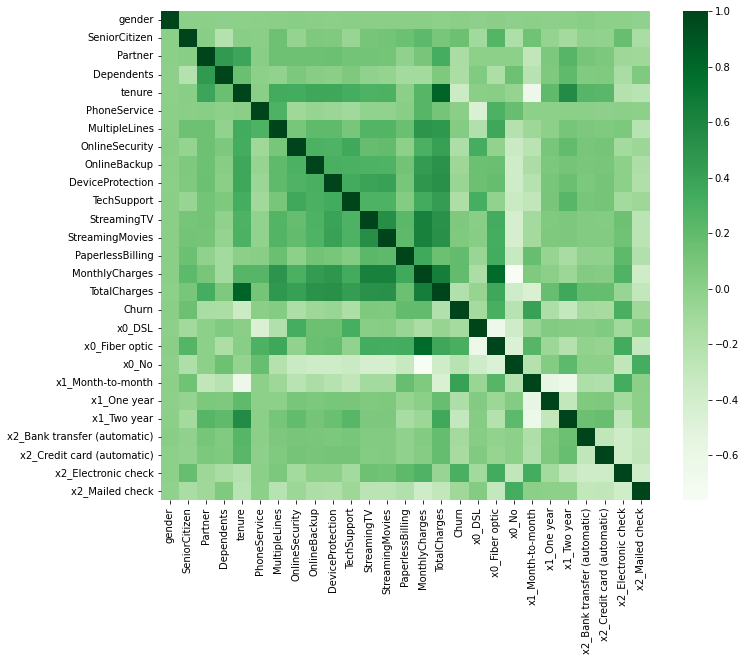

In [89]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, cmap="Greens", square=True)

Seems like Month to month, fibre optic and electronic check are positively correlated.

#                                                 Machine Learning

In [90]:
#import sklearn to train/test split
from sklearn.model_selection import train_test_split

Check for NA values in new Data Frame and replace with Median

In [91]:
#what still has NA :o
df.isna().sum()

gender                           0
SeniorCitizen                    0
Partner                          0
Dependents                       0
tenure                           0
PhoneService                     0
MultipleLines                    0
OnlineSecurity                   0
OnlineBackup                     0
DeviceProtection                 0
TechSupport                      0
StreamingTV                      0
StreamingMovies                  0
PaperlessBilling                 0
MonthlyCharges                   0
TotalCharges                    11
Churn                            0
x0_DSL                           0
x0_Fiber optic                   0
x0_No                            0
x1_Month-to-month                0
x1_One year                      0
x1_Two year                      0
x2_Bank transfer (automatic)     0
x2_Credit card (automatic)       0
x2_Electronic check              0
x2_Mailed check                  0
dtype: int64

In [92]:
df.TotalCharges = df.TotalCharges.fillna(df['TotalCharges'].median())

Split Data into Train and Test

In [93]:
#splitting the data here to 33% test and 67% train. Here our 'Y' Variable is churn as thats your main var
x_train, x_test, y_train, y_test = train_test_split( df.drop(columns=['Churn']), df.Churn, test_size=0.33, random_state=42)

In [94]:
print ('xTrain: ',x_train)
print('xTest: ',x_test)
print('yTrain: ',y_train)
print('yTest: ',y_test)

xTrain:              gender  SeniorCitizen  Partner  Dependents    tenure  \
customerID                                                         
2985-JUUBZ       0              0        1           1  0.310650   
5016-ETTFF       0              0        0           0 -0.910961   
1998-VHJHK       1              0        0           0 -0.218715   
1925-TIBLE       1              0        1           0 -1.033122   
0485-ZBSLN       0              0        1           1  1.328659   
...            ...            ...      ...         ...       ...   
0684-AOSIH       0              0        1           0 -1.277445   
5982-PSMKW       1              0        1           1 -0.381597   
8044-BGWPI       0              0        1           1 -0.829521   
7450-NWRTR       0              1        0           0 -0.829521   
4795-UXVCJ       0              0        0           0 -0.259435   

            PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  \
customerID                       

## Logistic Regression Model

In [95]:
# Linear Regresssion to predict Churn
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)
#Now are model has created a prediction or 'Y_prediction' to compare to our Y_test

In [96]:
#import confusion matrix to check accuracy
from sklearn.metrics import confusion_matrix

In [97]:
confusion_matrix(y_test, y_pred, labels=[0,1 ])

array([[1529,  168],
       [ 257,  371]])

In [98]:
#import Classification report to see how good it is
from sklearn.metrics import classification_report

In [99]:
#see your scores
#Base Model says we got an accuracy of 82% woot Woot !!
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1697
           1       0.69      0.59      0.64       628

    accuracy                           0.82      2325
   macro avg       0.77      0.75      0.76      2325
weighted avg       0.81      0.82      0.81      2325



In [100]:
print(y_pred)

[1 0 0 ... 1 0 0]


Probability of Customer Churning for all Customer ID

In [101]:
#This is the predicted probability that customers will churn (or Churn = 1)
reg.predict_proba(x_test)[:,1]

array([0.66300428, 0.06599087, 0.00459224, ..., 0.63239058, 0.49477522,
       0.26069833])

In [102]:
from sklearn.metrics import plot_confusion_matrix

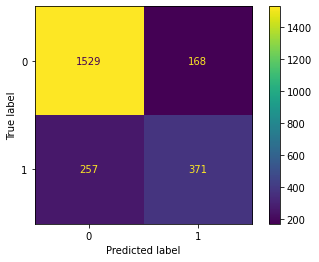

In [103]:
plot_confusion_matrix(reg, x_test, y_test)

## Light GBM Model

In [104]:
import lightgbm as lgb 
model = lgb.LGBMClassifier(num_leaves=30,n_estimators=100,learning_rate=0.02)
model.fit(x_train, y_train)    
y_pred = model.predict(x_test)

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1697
           1       0.72      0.47      0.57       628

    accuracy                           0.81      2325
   macro avg       0.77      0.70      0.72      2325
weighted avg       0.80      0.81      0.79      2325



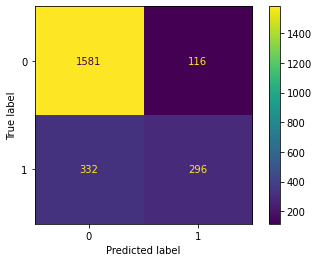

In [105]:
#Now we print confusion matrix and Classification Report for New Model
plot_confusion_matrix(model, x_test, y_test)
print(classification_report(y_test, y_pred, labels=[0,1]))

## Support Vector Machine Model

In [106]:
from sklearn import svm

In [107]:
clf = svm.SVC()

In [108]:
clf.fit(x_train, y_train)

SVC()

In [109]:
y_pred = clf.predict(x_test)

              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1697
           1       0.70      0.51      0.59       628

    accuracy                           0.81      2325
   macro avg       0.77      0.72      0.73      2325
weighted avg       0.80      0.81      0.80      2325



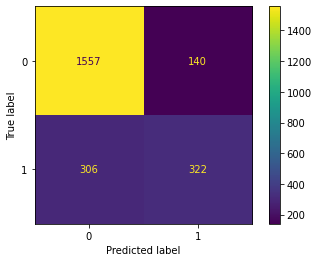

In [110]:
plot_confusion_matrix(clf, x_test, y_test)
print(classification_report(y_test, y_pred, labels=[0,1]))